<a href="https://colab.research.google.com/github/jovanneste/Spectrogram-Segmentation/blob/main/transfer_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import torch

In [ ]:
drive.mount('/content/drive', force_remount=True)

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git

In [ ]:
cd ../yolov7

In [ ]:
!pip install -r requirements.txt

In [20]:
print(torch.cuda.is_available())

True


In [ ]:
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt

In [ ]:
!python train.py --workers 8 --device 0 --batch-size 128 --data ../drive/MyDrive/dataset_2/data.yaml --img 334 217 --cfg cfg/training/yolov7-tiny.yaml --weights 'yolov7-tiny.pt' --name yolov7-tiny --hyp data/hyp.scratch.custom.yaml --epochs 128

In [ ]:
!python detect.py --weight runs/train/yolov7-tiny/weights/best.pt --conf 0.2 --img-size 352 --source ../drive/MyDrive/dataset_2/val/70.png

---

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

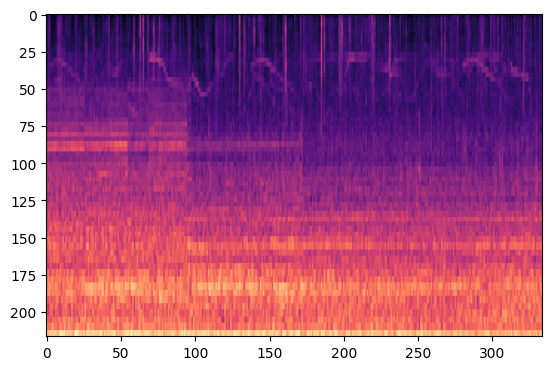

In [61]:
i = 70
exp_num +=1
img = f"../drive/MyDrive/dataset_2/val/{i}.png"
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

In [62]:
with open(f'../drive/MyDrive/dataset_2/val/{i}.txt', 'r') as file:
  bbox_data = file.readline().strip().split()
  _, x, y, w, h = map(float, bbox_data)

In [57]:
x

0.18

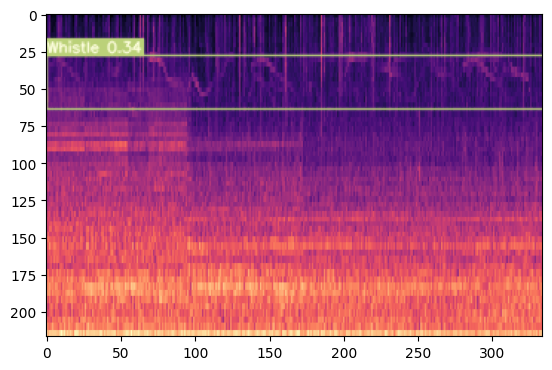

In [63]:
img = f"runs/detect/exp{exp_num}/{i}.png"
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

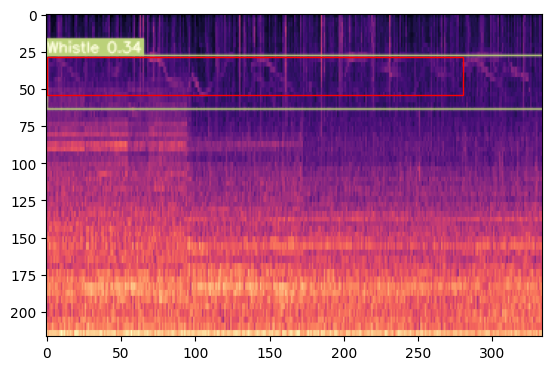

In [64]:
img_height, img_width, _ = img.shape


x_center = x * img_width
y_center = y * img_height
width = w * img_width
height = h * img_height


xc = x_center - width / 2
yc = y_center - height / 2

fig, ax = plt.subplots()
ax.imshow(img)


rect = patches.Rectangle((xc, yc), width, height, linewidth=1, edgecolor='r', facecolor='none')


ax.add_patch(rect)
plt.show()